<a href="https://colab.research.google.com/github/legong-beep/MPM_200_Gong/blob/main/Code/Copy_of_Assignment_4_11_19_4pm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

In [6]:
install.packages('beepr') #install beepr package from CRAN

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’




In [7]:
library (beepr) #load package so its functions are available

In [8]:
beep ("mario") #play mario sound, but no sound and warning note

Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [9]:
install.packages('tidyverse')
install.packages('dplyr')
install.packages('ggplot2')
install.packages('sjPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [12]:
#read the csv file and
data  = read.csv ("/Hummingbird_data (1).csv")

In [ ]:
head (data) #check first few rows and confirm file loaded correctly

,Admitted,Disposition_binary,Place,F_Aid,Species_e,Sex_e,Age_e,Brought_in_after,season,r,Green_Orange,ID
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,1/2/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,1,Winter,found on the ground,Non-selasphorus spp.,1_ANHU
2,1/2/1991,Released,Lindsey,Yes,ANHU,Female-like,adult-like,0,Winter,unknown,Non-selasphorus spp.,2_ANHU
3,1/4/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,suspect torpor-like state,Non-selasphorus spp.,3_ANHU
4,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,4,Winter,unknown,Non-selasphorus spp.,4_ANHU
5,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,caught by domestic animal,Non-selasphorus spp.,5_ANHU
6,1/5/1991,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Winter,found on the ground,Non-selasphorus spp.,6_ANHU


In [13]:
colnames(data) #to display al column names in the dataset

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [14]:
nrow (data) #prints total number of rows

[1] 6908

In [15]:
ncol(data) #prints total number of columns

[1] 12

In [16]:
dim(data) #to see both rows and columns togethher

[1] 6908   12

In [ ]:
## your code answer here

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [17]:
str(data) #viewing the structure of the dataframe


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [18]:
# Identify data types of each column
data_types = sapply(data, class)
print(data)

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [19]:
library(dplyr) #to load dplyr for sample_n and data manipulation
model_data = sample_n(data, 5000) #to randomy select 5000 rows from 'data' create 'model_data'


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [20]:
dim(model_data) #to print number of rows and columns in 'model_data'

[1] 5000   12

In [ ]:
#5000 rows and 12 columns present

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [21]:
data_types_model= sapply(model_data,class) #get data type of each column
table(data_types_model) #count how many columns are character/factor (catergorical) vs numeric (continuous)

data_types_model
character   integer 
       11         1 

In [ ]:
#11 columns are categorical and 1 continuous

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [22]:
library(ggplot2)

In [23]:
write.csv(model_data, "Hummingbird_data_Leia_Gong.csv, row.names = FALSE") #save the model

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [24]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4131
Santa Barbara,70
malibu,799


In [25]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [26]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

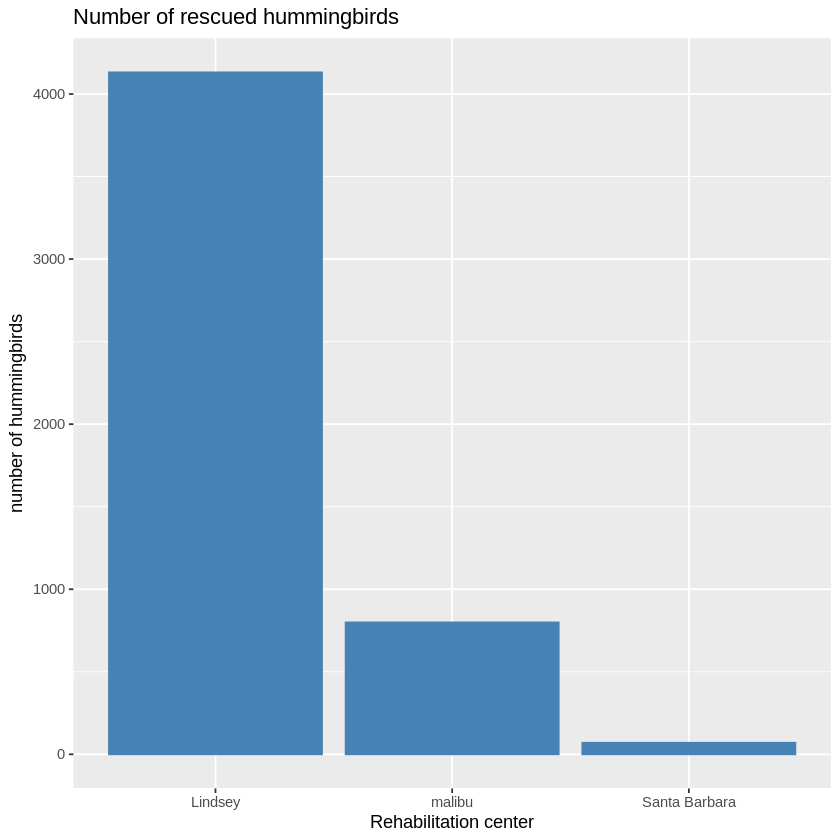

In [27]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [28]:
pdf("Hummingbird_plot.pdf", width = 4, height = 3)  # units are inches by default

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

In [ ]:
# rehab=; creates a new data fram called rehab and stores the results of the next steps
# model_data %>% , this uses the original dataset  and pipes it (%>%) inot the next function
# group_by(Place) %>%; tells R to group rows together based on value of place
# summarise(count = n_distinct(ID)); creates new coloum for each rehab center
# ('Rehabilitation center') labels for the x-axis to “Rehabilitation center”.
# ylab('number of hummingbirds') labels for the y-axis to “number of hummingbirds”.
# labs(title = "Number of rescued hummingbirds") this adds a main title to the plot.
# Opens a PDF file named Hummingbird_plot.pdf; sets the PDF page size to 4 inches wide and 3 inches tall.

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [ ]:
#5 covariates are Species_e, Sex_e, Age_e, season, r

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [ ]:
#Yes,it see,s that admission reason is associated with the final disposition; as for suggestions for statical testing logistic regression

In [ ]:
#Reason for admission: Birds that sustain injuries such as window collisions or attacks from domestic animals have a higher mortality rate, indicating a strong correlation with their final fate.
#Age class: Younger birds, such as nestlings and juveniles, seem to have lower survival rates compared to adults, suggesting that age likely influences their behavior.
#Weight / body condition: Birds with lower weight or poor body condition are less likely to survive, indicating a clear association between these factors and the outcome.
#Species group: Selasphorus species exhibit varying survival rates compared to non-selasphorus species, indicating that species plays a role in their survival.
#Season / time of year: Birds that migrate during certain seasons or face harsher environmental conditions exhibit lower survival rates, indicating that seasonal factors may influence their outcomes.


In [29]:
df = model_data  %>%
group_by(Species_e, Sex_e, Age_e, season, r)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e', 'Sex_e', 'Age_e', 'season'.
You can override using the `.groups` argument.


In [30]:
df

Species_e,Sex_e,Age_e,season,r,count
<chr>,<chr>,<chr>,<chr>,<chr>,<int>
ANHU,Female-like,adult-like,Fall,caught by domestic animal,74
ANHU,Female-like,adult-like,Fall,found inside,20
ANHU,Female-like,adult-like,Fall,found on the ground,130
ANHU,Female-like,adult-like,Fall,nest-related,2
ANHU,Female-like,adult-like,Fall,suspect torpor-like state,11
ANHU,Female-like,adult-like,Fall,unknown,36
ANHU,Female-like,adult-like,Fall,window hit,51
ANHU,Female-like,adult-like,Spring,caught by domestic animal,169
ANHU,Female-like,adult-like,Spring,found inside,38


In [31]:
covariate = model_data%>%
group_by(Species_e,Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_e'. You can override using the
`.groups` argument.


In [32]:
covariate

Species_e,Disposition_binary,count
<chr>,<chr>,<int>
ANHU,Died,2292
ANHU,Released,839
BCHU,Died,22
BCHU,Released,13
Non-selasphorus,Died,351
Non-selasphorus,Released,630
Selasphorus,Died,530
Selasphorus,Released,323


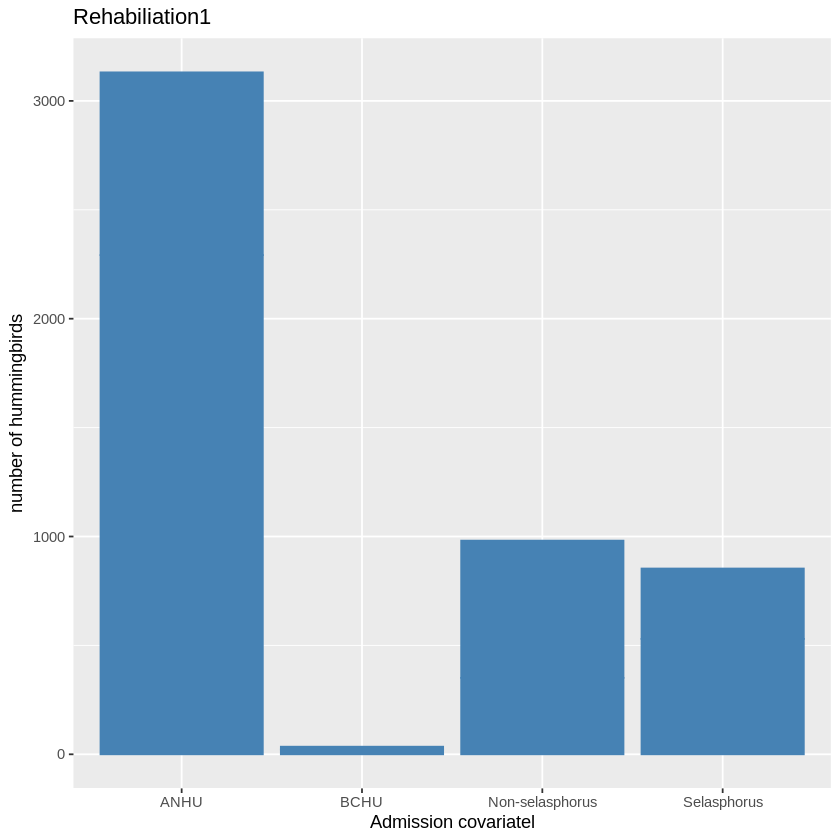

In [33]:
p1 = ggplot(covariate, aes(x = Species_e, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue') +
xlab ('Admission covariatel')+ ylab('number of hummingbirds')+
labs (title = "Rehabiliation1 ")
p1

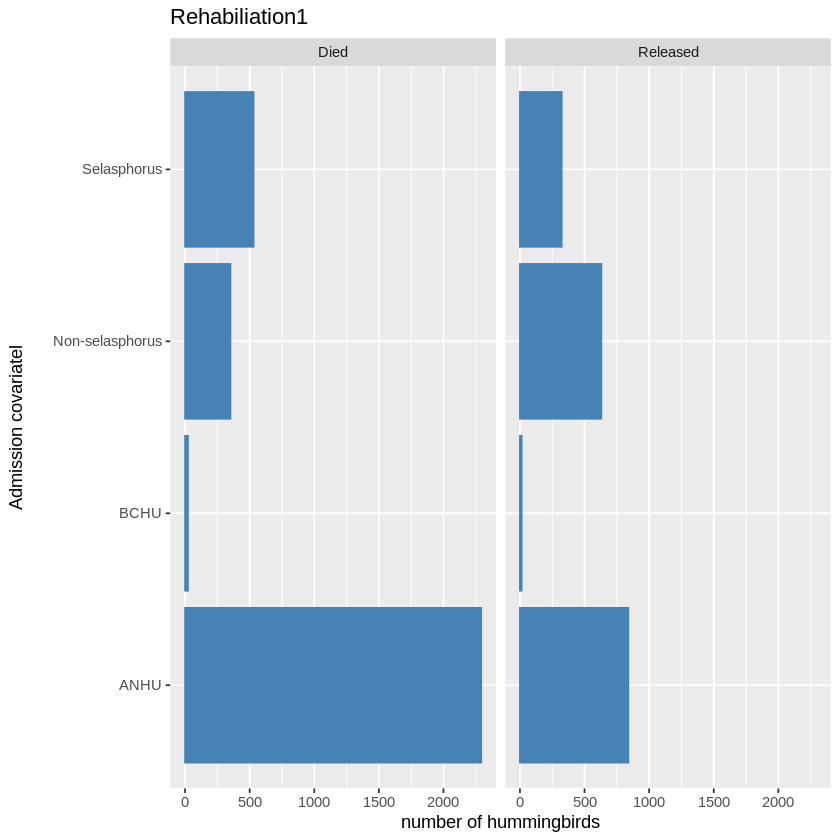

In [34]:
p1 + facet_grid(. ~ Disposition_binary)+ coord_flip()

In [35]:
covariate2 = model_data%>%
group_by(Sex_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Sex_e'. You can override using the
`.groups` argument.


In [36]:
covariate2

Sex_e,Disposition_binary,count
<chr>,<chr>,<int>
Female-like,Died,2353
Female-like,Released,917
Male,Died,404
Male,Released,116
unknown,Died,438
unknown,Released,772


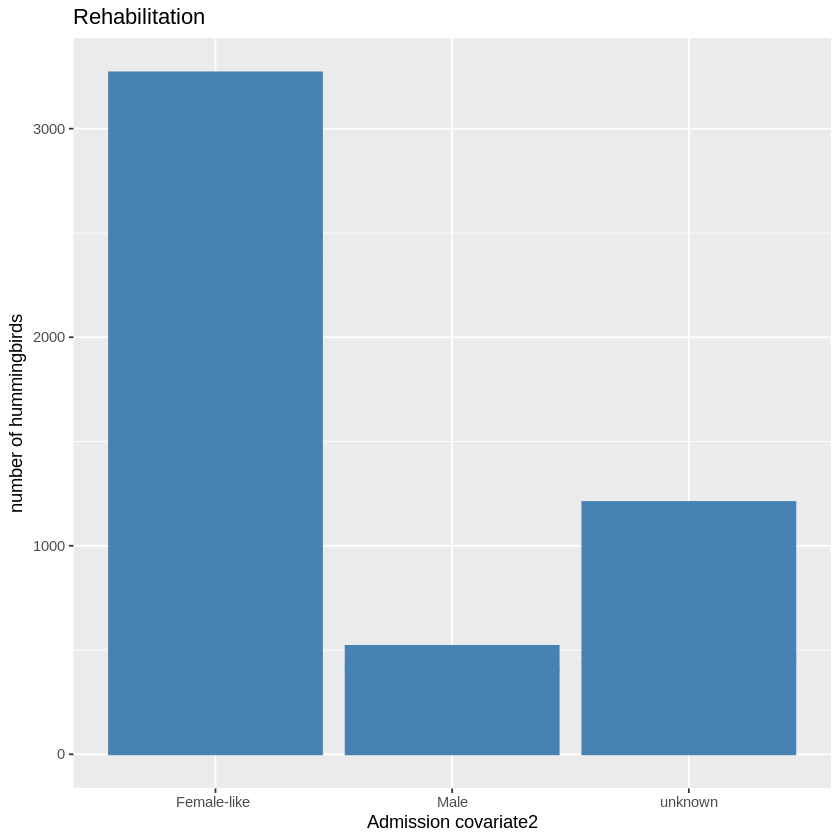

In [37]:
p2 = ggplot(covariate2, aes(x = Sex_e, y= count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Admission covariate2')+ ylab( 'number of hummingbirds') +
labs(title = "Rehabilitation")
p2

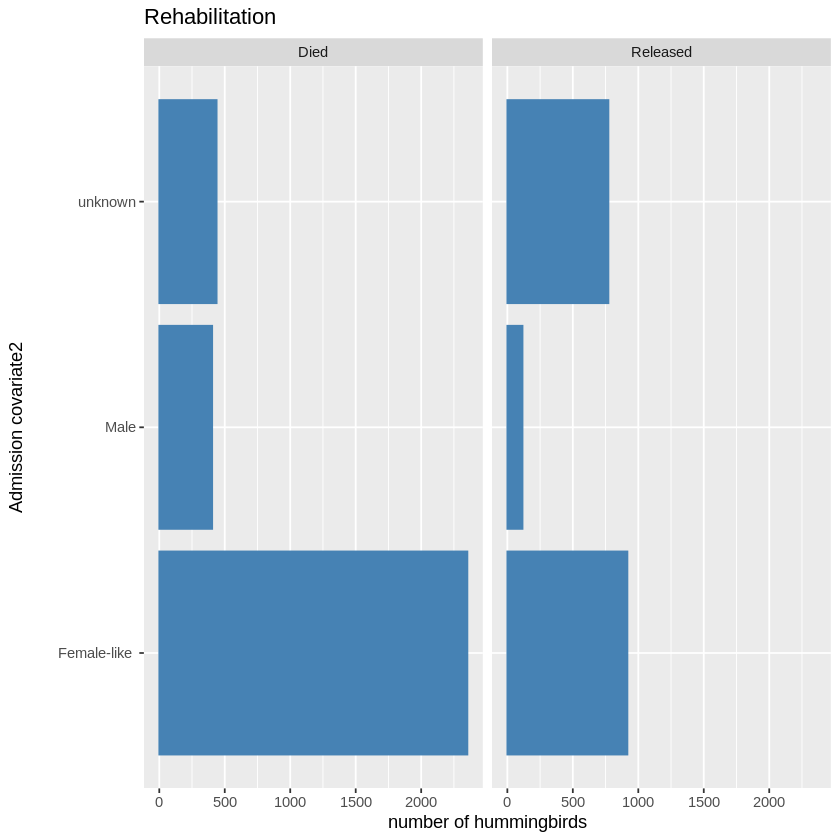

In [38]:
p2 + facet_grid(. ~ Disposition_binary)+ coord_flip()

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


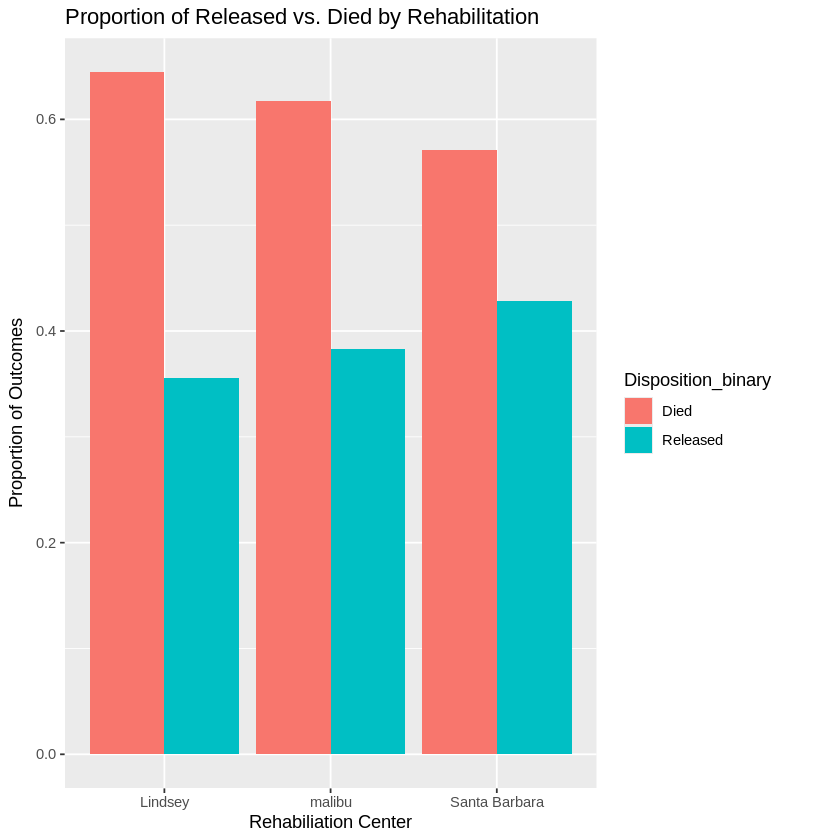

In [39]:
# Calculate proportions
proportions = model_data %>%
  group_by( Place, Disposition_binary) %>%
  summarise(count = n()) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion , fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabiliation Center") +
  ylab("Proportion of Outcomes") +
  labs(title = "Proportion of Released vs. Died by Rehabilitation")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

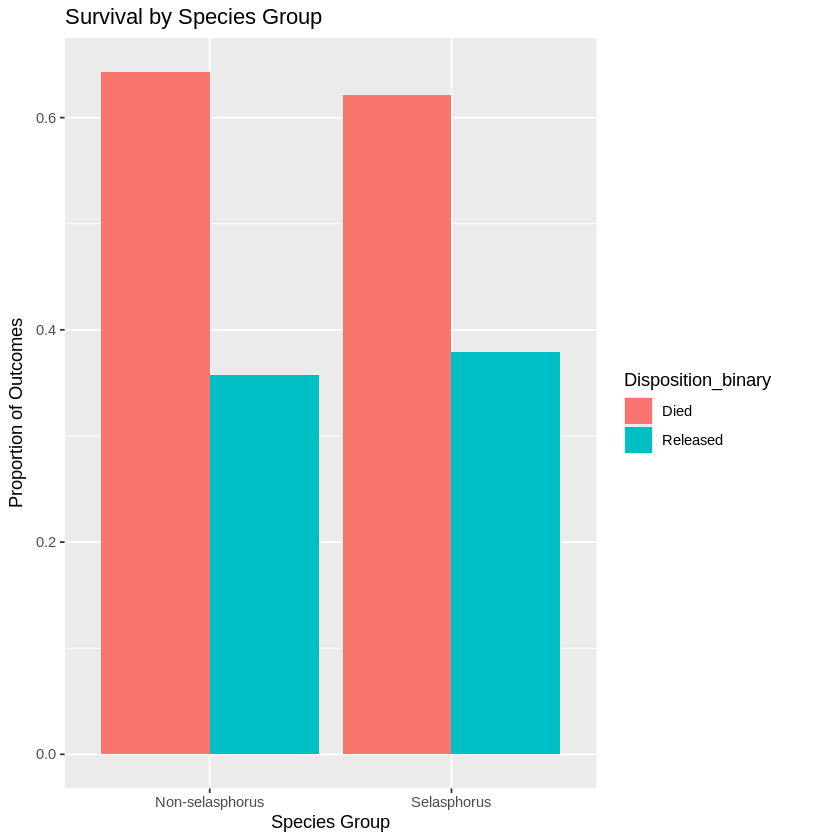

In [40]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(grepl("Selasphorus", model_data$Species_e),
                                  "Selasphorus",
                                  "Non-selasphorus")

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n(), .groups = "drop") %>%
  group_by(Species_group) %>%
  mutate(proportion = count / sum(count))

#Plot
ggplot(species_distribution, aes(x = Species_group, y = proportion, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Proportion of Outcomes") +
  labs(title = "Survival by Species Group")

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [41]:
model_data$Admitted_date= as.Date(model_data$Admitted, format = "%m/%d/%y")   # Replace with your actual column name

Q12a Please explain the argument `format` in code above

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [42]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

In [48]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%   # keep year-month for timeline
  group_by(Admitted_month, Species_group) %>%
  summarise(count = n(), .groups = "drop") %>%
  mutate(Admitted_month = as.Date(paste0(Admitted_month, "-01")))  # convert to Date for plotting

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


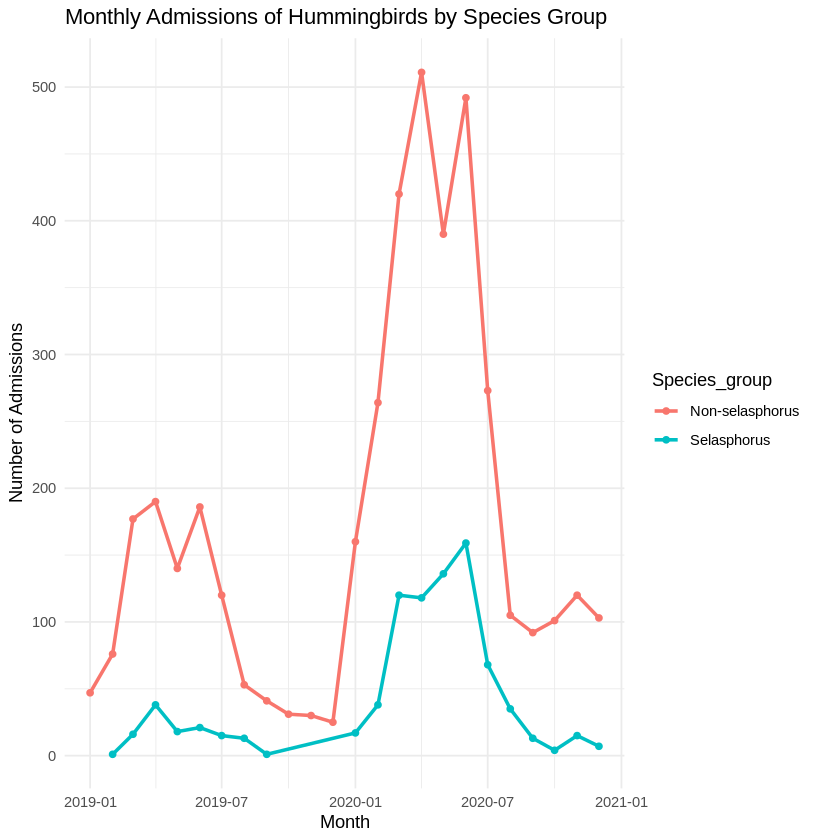

In [49]:
ggplot(admissions_by_month, aes(x = Admitted_month,
                                y = count,
                                color = Species_group)) +
  geom_line(size = 1) +
  geom_point() +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Monthly Admissions of Hummingbirds by Species Group") +
  theme_minimal()

In [ ]:
admissions_by_month

Admitted_month,count
<chr>,<int>
19-01,52
19-02,83
19-03,190
19-04,244
19-05,158
19-06,194
19-07,126
19-08,65
19-09,39


In [ ]:
admissions_by_year

Admitted_year,count
<chr>,<int>
19,1238
20,3762


Finally, we can use `ggplot` to plot these timelines.

In [ ]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat="identity", color = 'navy', fill = 'navy') +
  xlab('month') +
  ylab('number') +
  labs(title='Hummingbirds admissions by month')

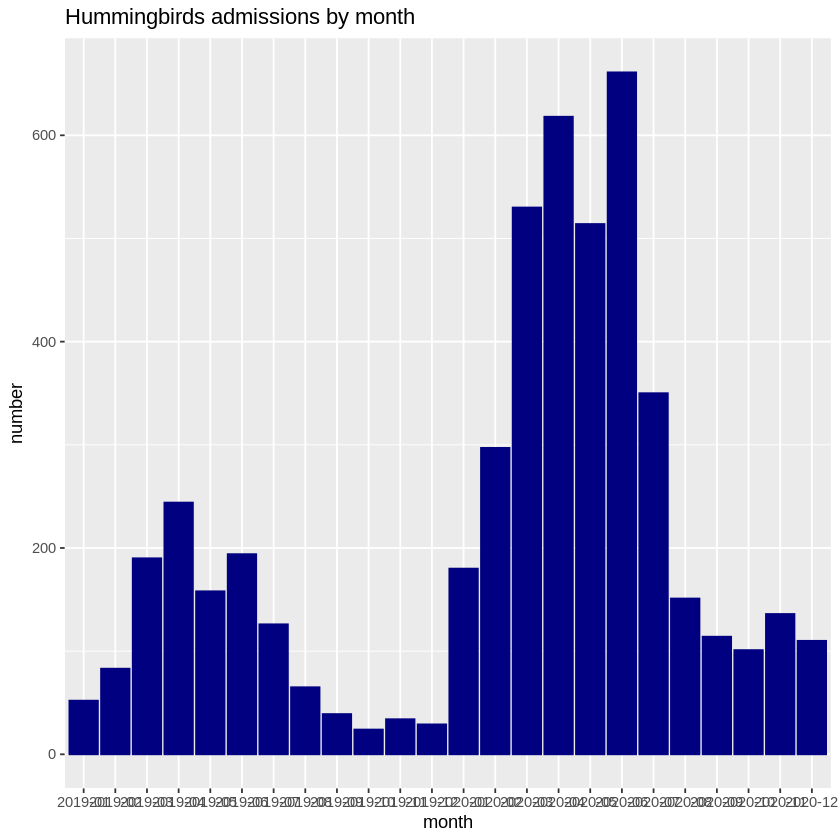

In [ ]:
p_month

In [ ]:
## Plot similar timeline for Yearly admissions of Hummingbirds

In [ ]:
p_year = ggplot(admissions_by_year, aes(x= Admitted_year, y = count)) +
  geom_bar(stat="identity", color = 'blue', fill = 'blue') +
  xlab ('year')+
  ylab ('number') +
  labs(title = 'Hummingbirds admissions by year')

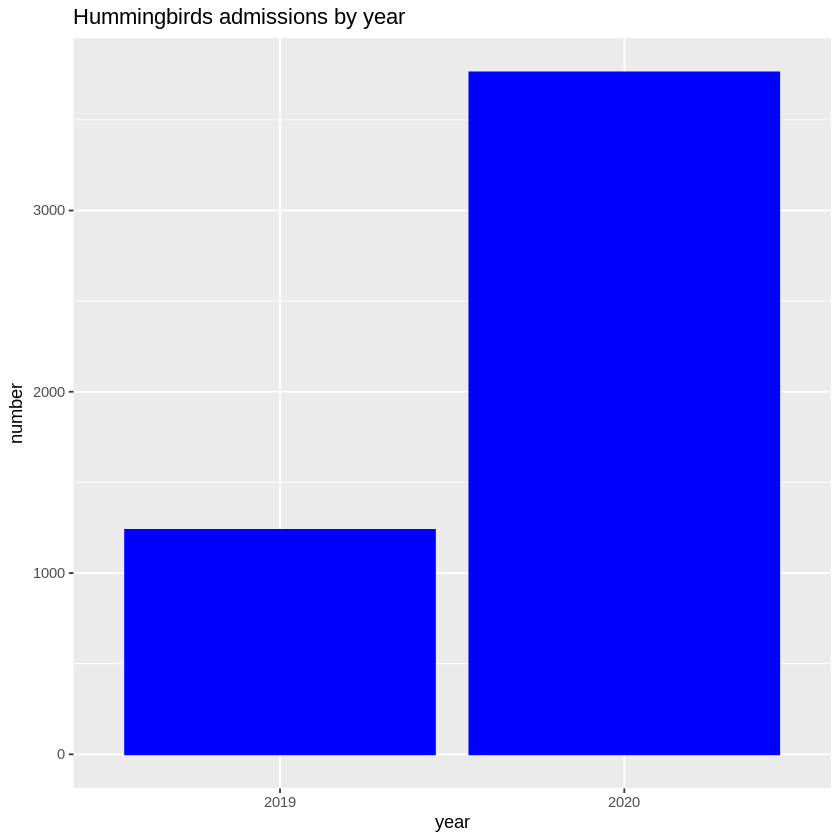

In [ ]:
p_year

1. Complete the code and fit a full model

In [59]:
ls()
names(model_data)

[1] "admissions_by_month"  "admissions_by_year"   "admissions_month"    
 [4] "covariate"            "covariate2"           "data"                
 [7] "data_types"           "data_types_model"     "df"                  
[10] "model_data"           "p"                    "p1"                  
[13] "p2"                   "proportions"          "rehab"               
[16] "species_distribution"

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"                
[13] "Species_group"      "Admitted_date"

In [64]:
head(model_data)
names(model_data)

,Admitted,Disposition_binary,Place,F_Aid,Species_e,Sex_e,Age_e,Brought_in_after,season,r,Green_Orange,ID,Species_group,Admitted_date
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>
1,3/30/2004,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Spring,found on the ground,Non-selasphorus spp.,2646_ANHU,Non-selasphorus,2020-03-30
2,5/7/2011,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Spring,suspect torpor-like state,Non-selasphorus spp.,4200_ANHU,Non-selasphorus,2020-05-07
3,5/26/1999,Died,Lindsey,No,ANHU,Female-like,adult-like,0,Spring,caught by domestic animal,Non-selasphorus spp.,1640_ANHU,Non-selasphorus,2019-05-26
4,3/30/1993,Released,Lindsey,No,ANHU,Female-like,adult-like,0,Spring,unknown,Non-selasphorus spp.,414_ANHU,Non-selasphorus,2019-03-30
5,6/16/2014,Died,malibu,No,Selasphorus,Female-like,adult-like,0,Summer,unknown,Selasphorus spp.,6301_ALHU,Selasphorus,2020-06-16
6,4/2/2013,Released,Lindsey,Yes,Non-selasphorus,unknown,Nestling,0,Spring,found on the ground,Non-selasphorus spp.,4668_ANHU,Non-selasphorus,2020-04-02


[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"                
[13] "Species_group"      "Admitted_date"

In [65]:
table(model_data$Disposition_binary)
str(model_data$Disposition_binary)


    Died Released 
    3195     1805 

 chr [1:5000] "Died" "Died" "Died" "Released" "Died" "Released" "Died" ...


In [66]:
model_data$Disposition_binary <- factor(model_data$Disposition_binary, levels = c("Died", "Released"))

In [67]:
model_data$Disposition_binary <- ifelse(model_data$Disposition_binary == "Released", 1, 0)

In [68]:
fullmodel = glm(Disposition_binary ~ r + Green_Orange + season + F_Aid + Species_e,
                data = model_data,
                family = binomial(link = "logit"))
fullmodel


Call:  glm(formula = Disposition_binary ~ r + Green_Orange + season + 
    F_Aid + Species_e, family = binomial(link = "logit"), data = model_data)

Coefficients:
                 (Intercept)                 rfound inside  
                    -1.93504                      -0.01466  
        rfound on the ground                 rnest-related  
                     0.04574                       0.57322  
  rsuspect torpor-like state                      runknown  
                    -1.05260                       0.29830  
                 rwindow hit  Green_OrangeSelasphorus spp.  
                    -0.13050                       0.24035  
                seasonSpring                  seasonSummer  
                     1.13533                       1.04740  
                seasonWinter                      F_AidYes  
                     0.58056                      -0.05571  
               Species_eBCHU      Species_eNon-selasphorus  
                     0.31758               

In [69]:
names(fullmodel)
length(names(fullmodel))

[1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"

[1] 30

In [ ]:
backward_model = step(__________,k=2,direction = "backward",test="Chisq")

In [ ]:
forward_model = step(___________,k=2,direction = ,test="Chisq")

In [ ]:
names(backward_model)

In [ ]:
library(sjPlot)

In [ ]:
tab_model(backward_model)